In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as pltv 
import seaborn as sns
import plotly.express as px 


In [ ]:
df = pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
# Missing Values
print(df.isna().sum()) #.dropna() klo ada data yg ilang

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [ ]:
#Buat liat perbandingan jumlah quality wine yg kita punya
fig = px.histogram(df,x='quality')
fig.show()

Convert to a Classification

In [ ]:
# Create Classification
df['goodquality'] = [1 if x >= 7 else 0 for x in df['quality']]
X = df.drop(['quality','goodquality'], axis = 1)
y = df['goodquality']

In [ ]:
df['goodquality'].value_counts()

0    1382
1     217
Name: goodquality, dtype: int64

Split data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

Preparing Data for Modelling

In [ ]:
from sklearn.preprocessing import StandardScaler #normalisasi, supaya valuenya dalam skala yang sama
X_features = X
X = StandardScaler().fit_transform(X)

In [ ]:
print(f'Train :{X_train.shape[0]} ')

Train :1199 


Modeling

1. Decision Tree

In [ ]:
from sklearn.metrics import classification_report 
from sklearn.tree import DecisionTreeClassifier
Dec_Tree = DecisionTreeClassifier(random_state=1)
Dec_Tree.fit(X_train, y_train)
y_predDec = Dec_Tree.predict(X_test)
print(classification_report(y_test, y_predDec))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       355
           1       0.55      0.71      0.62        45

    accuracy                           0.90       400
   macro avg       0.76      0.82      0.78       400
weighted avg       0.92      0.90      0.91       400



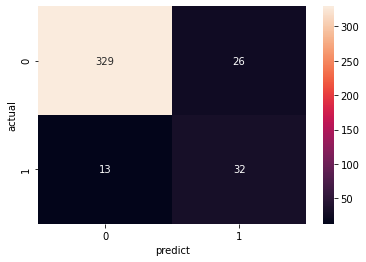

In [ ]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test, y_predDec)
ax1 = sns.heatmap(cm1,annot=True,fmt='2.0f')
ax1.set(xlabel='predict', ylabel='actual')
pltv.show()
#329 =  true negatif 
#26 = false positif 
#13 = false negatif
#32 = true positif

# 0 = bad quality
# 1 = good quality

#(TP/TP+FP)=presisi, (TP/TP+FN)= recall buat data 1
#(TN/TN+FN)=presisi, (TN/TN+FP)=recall buat data 0

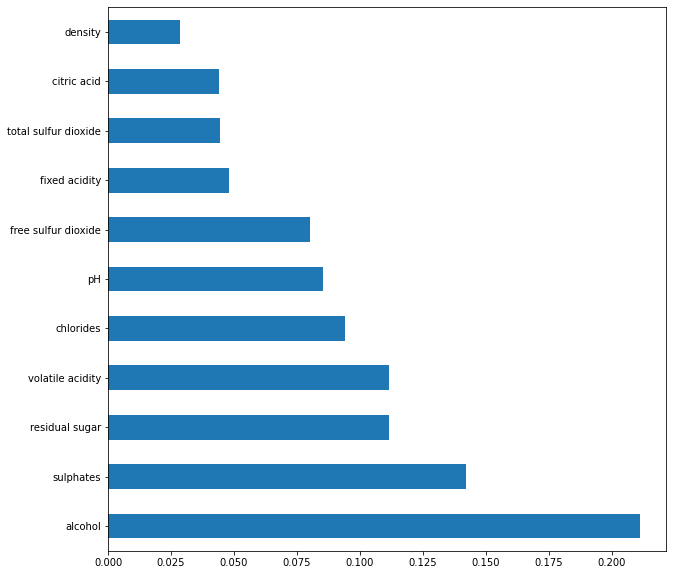

In [ ]:
feat_importances = pd.Series(Dec_Tree.feature_importances_, index=X_features.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

2. Random Forest

In [ ]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
Random_Forest = RandomForestClassifier(random_state=1)
Random_Forest.fit(X_train, y_train)
y_pred = Random_Forest.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       355
           1       0.68      0.58      0.63        45

    accuracy                           0.92       400
   macro avg       0.82      0.77      0.79       400
weighted avg       0.92      0.92      0.92       400



accuracy menggambarkan seberapa akurat model dalam mengklasifikasikan dengan benar.

Precision menggambarkan akurasi antara data yang diminta dengan hasil prediksi yang diberikan oleh model.

Recall atau sensitivity: menggambarkan keberhasilan model dalam menemukan kembali sebuah informasi.

F-1 Score menggambarkan perbandingan rata-rata precision dan recall yang dibobotkan.

cara menghitungnya :

accuracy = (TP+TN) / (TP+FP+FN+TN)

(TP/TP+FP)=presisi, (TP/TP+FN)= recall buat data 1

(TN/TN+FN)=presisi, (TN/TN+FP)=recall buat data 0

F-1 Score = (2 * Recall * Precision) / (Recall + Precision)

confusion matrix digunakan untuk melihat hasil apakah prediksinya mendapat true poritive atau true negative dan lainnya

https://socs.binus.ac.id/2020/11/01/confusion-matrix/

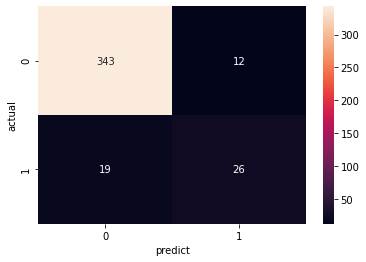

In [ ]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test, y_pred)
ax1 = sns.heatmap(cm1,annot=True,fmt='2.0f')
ax1.set(xlabel='predict', ylabel='actual')
pltv.show()

Feature Importance

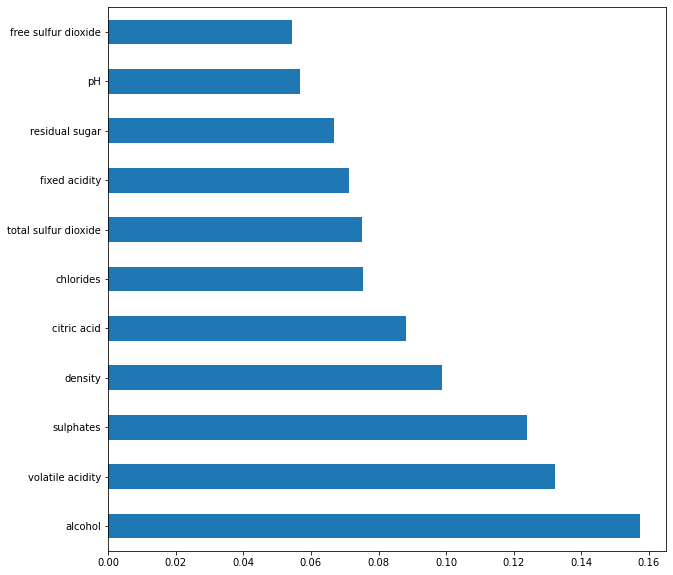

In [ ]:
feat_importances = pd.Series(Random_Forest.feature_importances_, index=X_features.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))